In [4]:
%run "..\data_cleaning\data_preprocessing.ipynb"

In [15]:
df = fetch_and_merge()

In [16]:
target_df = df[['WORLDPOSX','WORLDPOSY','WORLDPOSZ','WORLDFORWARDDIRX','WORLDFORWARDDIRY','WORLDFORWARDDIRZ','WORLDRIGHTDIRX','WORLDRIGHTDIRY','WORLDRIGHTDIRZ']]

In [26]:
print(target_df["WORLDFORWARDDIRX"].describe())
print(target_df["WORLDFORWARDDIRY"].describe())
print(target_df["WORLDFORWARDDIRZ"].describe())

count   1851300.000000
mean       -517.877500
std       22497.193888
min      -32767.000000
25%      -22998.000000
50%       -2407.000000
75%       23530.000000
max       32767.000000
Name: WORLDFORWARDDIRX, dtype: float64
count   1851300.000000
mean         -5.620178
std         273.617497
min       -7831.000000
25%        -128.000000
50%          -5.000000
75%         136.000000
max        7046.000000
Name: WORLDFORWARDDIRY, dtype: float64
count   1851300.000000
mean      -1502.385174
std       23767.844227
min      -32767.000000
25%      -23311.000000
50%       -4446.500000
75%       22869.000000
max       32767.000000
Name: WORLDFORWARDDIRZ, dtype: float64


In [27]:
print(target_df["WORLDRIGHTDIRX"].describe())
print(target_df["WORLDRIGHTDIRY"].describe())
print(target_df["WORLDRIGHTDIRZ"].describe())

count   1851300.000000
mean       1502.780122
std       23762.194601
min      -32766.000000
25%      -22863.000000
50%        4444.000000
75%       23306.000000
max       32767.000000
Name: WORLDRIGHTDIRX, dtype: float64
count   1851300.000000
mean       -111.010137
std         751.497031
min       -7841.000000
25%        -826.000000
50%        -331.000000
75%         724.000000
max        6761.000000
Name: WORLDRIGHTDIRY, dtype: float64
count   1851300.000000
mean       -517.727132
std       22491.966575
min      -32766.000000
25%      -22993.000000
50%       -2408.000000
75%       23521.000000
max       32766.000000
Name: WORLDRIGHTDIRZ, dtype: float64


In [31]:
target_df

,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,FORWARD_ANGLE
0,113.192245,465.303589,2.900799,-23615.0,-138.0,-22714.0,22704.0,846.0,-23610.0,0.005844
1,116.142723,462.470612,2.874730,-23685.0,-190.0,-22641.0,22630.0,850.0,-23681.0,0.008022
2,119.108170,459.637115,2.845881,-23765.0,-195.0,-22557.0,22547.0,812.0,-23761.0,0.008205
3,122.087158,456.805298,2.821898,-23824.0,-174.0,-22495.0,22485.0,809.0,-23820.0,0.007303
4,125.073685,453.976288,2.798889,-23838.0,-140.0,-22480.0,22471.0,820.0,-23833.0,0.005873
...,...,...,...,...,...,...,...,...,...,...
1851295,-40.809601,614.561646,3.011027,-23539.0,40.0,-22794.0,22786.0,916.0,-23529.0,-0.001699
1851296,-37.301765,611.174988,3.016551,-23598.0,118.0,-22732.0,22726.0,914.0,-23586.0,-0.005000
1851297,-34.656796,608.636902,3.027945,-23714.0,85.0,-22611.0,22604.0,915.0,-23703.0,-0.003584
1851298,-31.990505,606.096863,3.039004,-23833.0,121.0,-22485.0,22479.0,925.0,-23822.0,-0.005077


In [28]:
target_df["FORWARD_ANGLE"] = np.arctan(target_df["WORLDFORWARDDIRY"]/target_df["WORLDFORWARDDIRX"])

C:\Users\Issac\AppData\Local\Temp\ipykernel_23800\1948675097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df["FORWARD_ANGLE"] = np.arctan(target_df["WORLDFORWARDDIRY"]/target_df["WORLDFORWARDDIRX"])


In [34]:
target_df["RIGHT_ANGLE"] = np.arctan(target_df["WORLDRIGHTDIRY"]/target_df["WORLDRIGHTDIRX"])

C:\Users\Issac\AppData\Local\Temp\ipykernel_23800\3247939022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df["RIGHT_ANGLE"] = np.arctan(target_df["WORLDRIGHTDIRY"]/target_df["WORLDRIGHTDIRX"])


In [39]:
temp_df = target_df[(target_df["FORWARD_ANGLE"]>0.1)|(target_df["FORWARD_ANGLE"]<-0.1)]

In [40]:
temp_df

,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,FORWARD_ANGLE,RIGHT_ANGLE
102,377.987000,188.529175,2.115592,-4338.0,521.0,-32474.0,32470.0,-669.0,-4348.0,-0.119529,-0.020601
103,378.201630,186.611343,2.148704,-3148.0,633.0,-32609.0,32608.0,-618.0,-3160.0,-0.198434,-0.018950
104,378.349365,184.694122,2.186503,-1946.0,678.0,-32702.0,32702.0,-624.0,-1958.0,-0.335255,-0.019079
105,378.432861,182.780380,2.225388,-760.0,662.0,-32751.0,32752.0,-611.0,-772.0,-0.716590,-0.018653
106,378.453918,180.873154,2.263242,400.0,623.0,-32758.0,32758.0,-643.0,388.0,1.000027,-0.019626
...,...,...,...,...,...,...,...,...,...,...,...
1850463,-105.043877,-499.527588,3.402038,-400.0,-68.0,32764.0,-32754.0,-818.0,-402.0,0.168390,0.024969
1850542,-17.407642,-149.599411,3.296341,-322.0,-55.0,32765.0,-32755.0,792.0,-321.0,0.169175,-0.024175
1850543,-17.330530,-145.364120,3.283719,334.0,-95.0,32765.0,-32755.0,805.0,336.0,-0.277113,-0.024571
1850883,-736.154968,776.163269,3.830862,734.0,108.0,32758.0,-32753.0,-556.0,736.0,0.146091,0.016974


<function matplotlib.pyplot.show(close=None, block=None)>

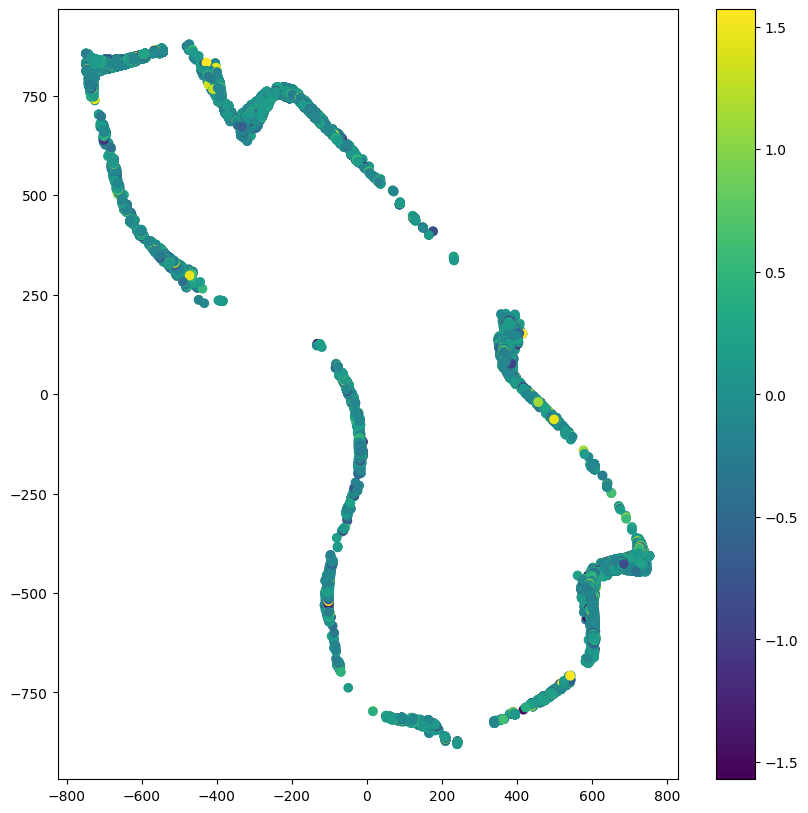

In [41]:
fig = plt.figure(figsize=(10,10))
X=temp_df["WORLDPOSX"]
Y=temp_df["WORLDPOSY"]
Z=temp_df["FORWARD_ANGLE"]
plt.scatter(X,Y,c=Z,cmap='viridis')
plt.colorbar()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

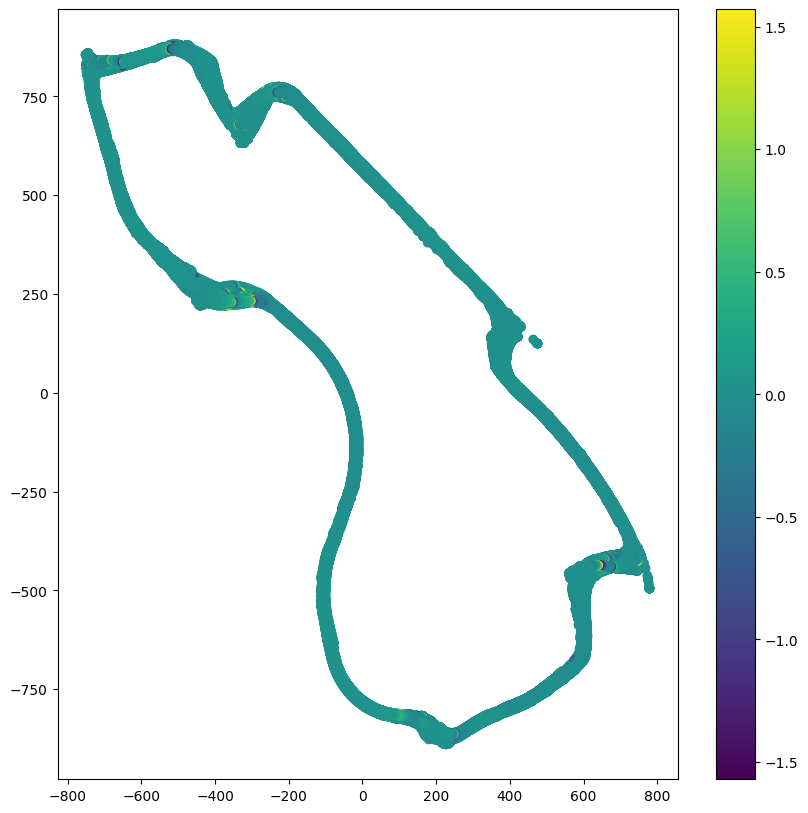

In [35]:
fig = plt.figure(figsize=(10,10))
X=target_df["WORLDPOSX"]
Y=target_df["WORLDPOSY"]
Z=target_df["RIGHT_ANGLE"]
plt.scatter(X,Y,c=Z,cmap='viridis')
plt.colorbar()
plt.show